# Predicting Parkinson's Disease: Harnessing Machine Learning for Accurate Diagnosis

### Project

The aim of this project is to develop a machine learning algorithm that predicts whether a patient has Parkinson Disease or not.

##### About Dataset
Context
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

##### Data
The data & attributes information for this project is available at data

##### Attribute Information:

Matrix column entries (attributes):
** name - ASCII subject name and recording number

** MDVP:Fo(Hz) - Average vocal fundamental frequency

** MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

** MDVP:Flo(Hz) - Minimum vocal fundamental frequency

** MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

** MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

** NHR,HNR - Two measures of ratio of noise to tonal components in the voice

**status - Health status of the subject (one) - Parkinson's, (zero) - healthy

** RPDE,D2 - Two nonlinear dynamical complexity measures

** DFA - Signal fractal scaling exponent 

** spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

#### Step 1. Import Relevant Imports

In [1]:
## Import the needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
sns.set_style('dark')

### Load dataset

In [2]:
park_df = pd.read_csv("Parkinsson_disease.csv")
park_df.head().style.background_gradient()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Data Exploration

In [3]:
park_df.shape

(195, 24)

In [4]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
park_df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
park_df.describe().style.background_gradient()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


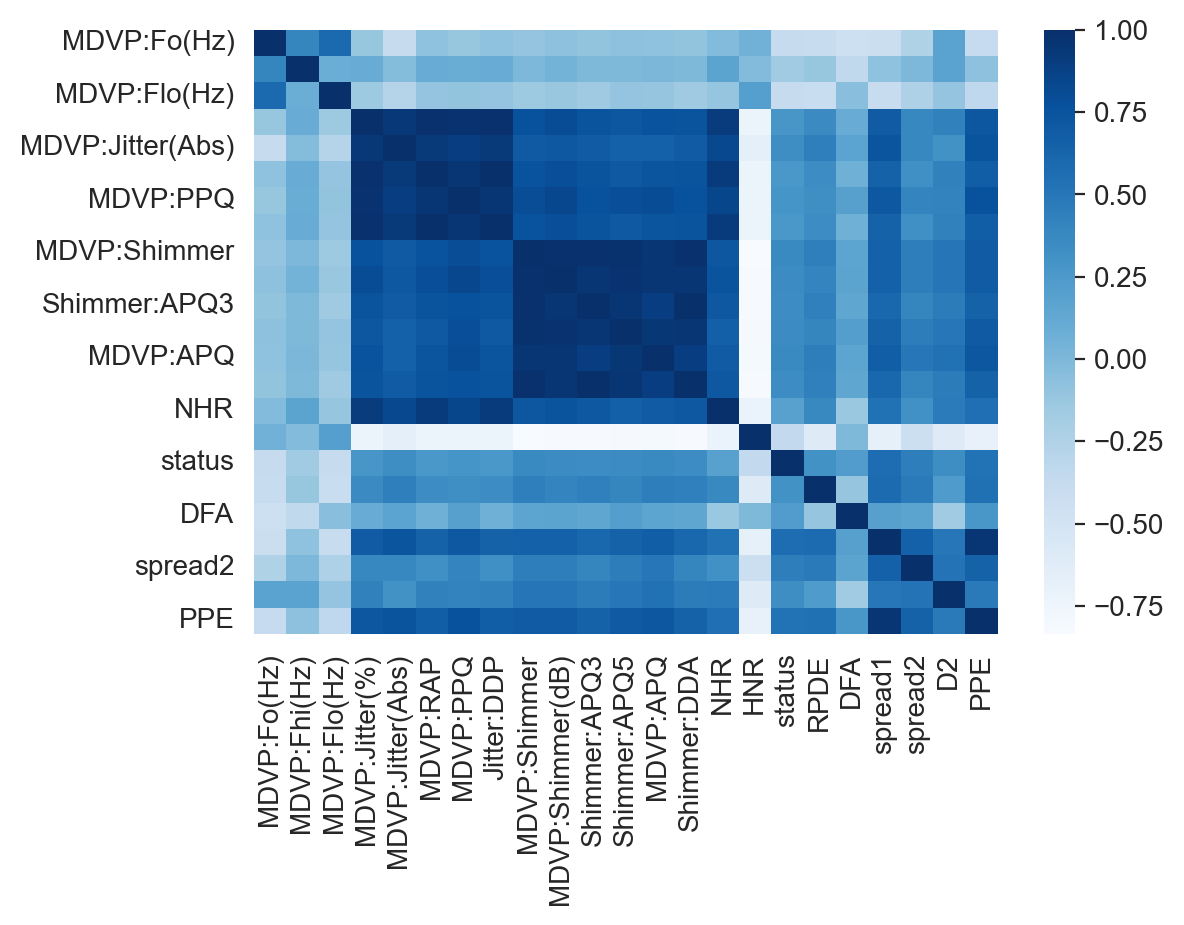

In [7]:
plt.figure(dpi=200)
sns.heatmap(data=park_df.corr(),cmap='Blues')
plt.show()

In [8]:
park_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


The above heatmap  and correlation tabele shows how correlated the features are to each other. HNR has negative corrrelation with most features except MDVP:Fo(Hz). MDVP:Jitter(%) is highly correlated with MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer(dB) and NHR.	


In [9]:
# find the correlation co-efficient
corr_df =park_df.corr().abs()['status'].sort_values(ascending=False)
corr_df

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

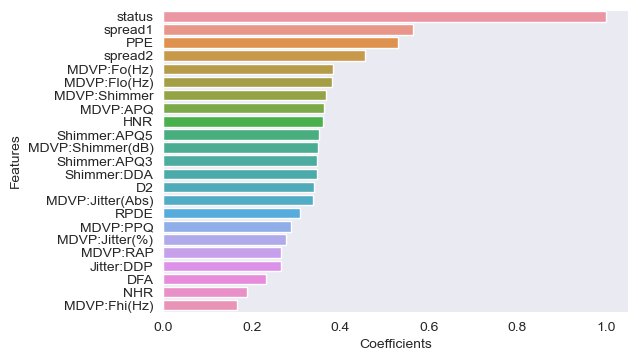

In [10]:
plt.figure(dpi=100)
sns.barplot(x=corr_df, y=corr_df.index)
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

The barplot chart above shows how correlated the features are to the status(outcome variable). At the end,we would drop five features that were least correlated. 

In [11]:
park_df.drop(columns=['name','MDVP:Fhi(Hz)','NHR','DFA','Jitter:DDP','MDVP:RAP'],inplace=True)

In [12]:
# create a pie chart to show the distribution of patients with and without parkinson disease
def create_barplot(data):
    plt.figure(dpi=100)
    plt.title('Distribution of Patients Parkinsson Status')
    sns.countplot(data=data,x='status')
    plt.show()

In [13]:
status_count = park_df['status'].value_counts(normalize=True).sort_values()
status_count

0    0.246154
1    0.753846
Name: status, dtype: float64

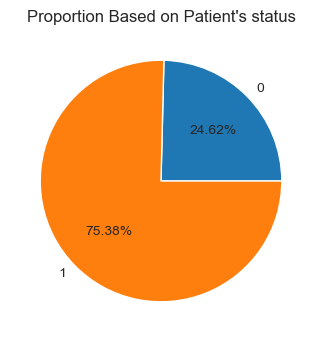

In [14]:
plt.figure(dpi=100)
plt.title("Proportion Based on Patient's status")
plt.pie(x=status_count.values, labels=status_count.index, autopct='%1.2f%%')
plt.show()

The illustrative graph above shows that there is class imbalance in the dataset for the target variable ‘status’, as it has 75.5% of patients with Parkinson and the remaining 24.6% as those that don’t have Parkinson. This dataset needs to be balanced before developing ML algorithm for classification.

In [15]:
# create a box plot to show the distribution of spread among the two clases of status
def create_boxplot(colseries, title):
    plt.figure(dpi=100)
    sns.boxplot(data=park_df,y=colseries,x='status')
    plt.title(title)
    plt.show()

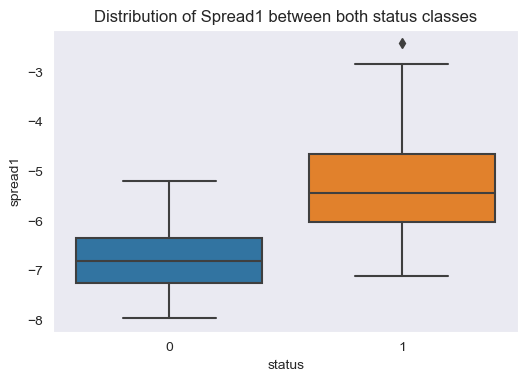

In [16]:
create_boxplot('spread1', 'Distribution of Spread1 between both status classes')

The boxplots shows that the distribution is symmetric/normal and patients with Parkinson disease have higher median value in spread1

In [17]:
# create a kdeplot to show the distribution of ppe among the two clases of status
def create_kdeplot(colseries, title):
    plt.figure(dpi=100)
    sns.kdeplot(data=park_df,x=colseries,hue='status',shade=True)
    plt.title(title)
    plt.show()

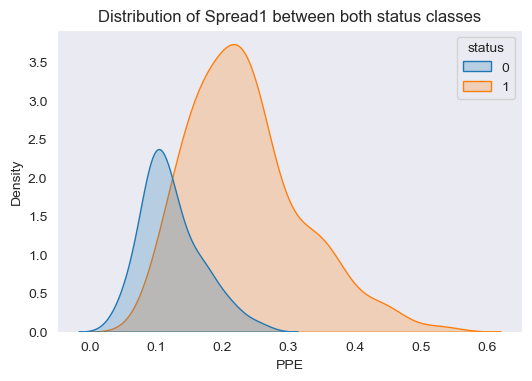

In [18]:
create_kdeplot('PPE','Distribution of Spread1 between both status classes')

From the kdeplot above, we could see that patients without Parkinson disease, the ppe is clustered more at 0.1 while on the other hand patients with Parkinson has ppe clustered more within the 0.2 and 0.3 with a bit of variation . This means that Parkinson was detected more on patient with ppe within the range of 0.2 to 0.35. As the PPE increases, there is a decline in detection rate.

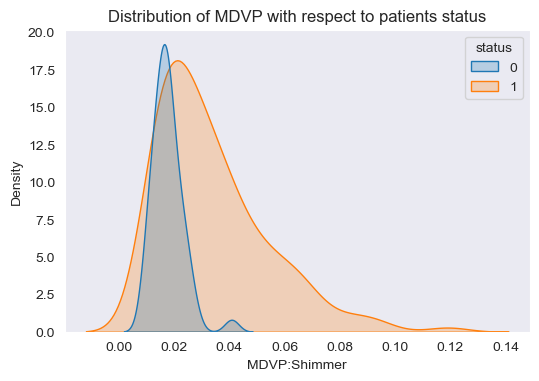

In [19]:
create_kdeplot('MDVP:Shimmer','Distribution of MDVP with respect to patients status')

From this kdeplot of MDVP:Shimmer distribution in parkinson patients, we could see that in patients without Parkinson disease, the MDVP is clustered more at 0.02. On the other hand patients with Parkinson had MDVP clustered more around 0.03 to 0.04. This means that Parkinson was detected more on patient with MDVP values within the range of 0.03 to 0.04 and declined as the MDVP value increases .

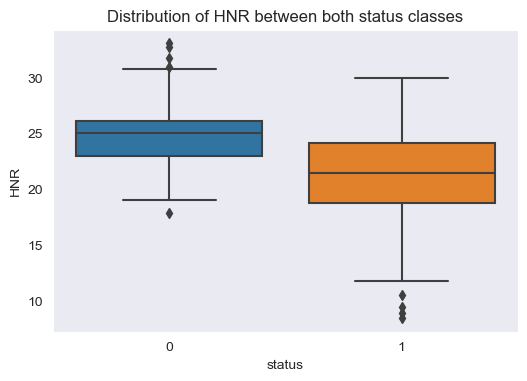

In [20]:
create_boxplot('HNR','Distribution of HNR between both status classes')

From the boxplot, we could see that patients without Parkinson disease, have higher median value in HNR(Harmonic-to-noise ratio which is used to assess the degree of hoarseness in voice). on the other hand patients with Parkinson had lower median value in HNR. This means that Parkinson are discovered more on patient with lower HNR. Such patients are characterized by reduced vocal tract loudness, reduced speech prosody, imprecise articulation, significantly narrower pitch range, longer pauses, vocal tremor, breathy vocal quality, harsh voice quality, and disfluency.

#### Resample Dataset

In [21]:
from sklearn.utils import resample,shuffle

In [22]:
#declare 2 variables for the classes of the status
df_minority= park_df[park_df['status']==0]
df_majority= park_df[park_df['status']==1]

In [23]:
#upsample the 0 class of status feature by 140.
df_upsample = resample(df_minority,replace=True,n_samples=140,random_state=42)

In [24]:
# use append function to join class 0 to the class 1 of the status feature
df = df_upsample.append(df_majority, ignore_index=True)
df.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,status,RPDE,spread1,spread2,D2,PPE
0,116.286,96.983,0.00314,0.00003,0.00192,0.01564,0.136,0.00667,0.00990,0.01691,0.02001,24.199,0,0.598515,-5.592584,0.133917,2.058658,0.214346
1,240.301,219.783,0.00517,0.00002,0.00283,0.02018,0.212,0.01176,0.01191,0.01344,0.03529,21.020,0,0.371837,-7.169701,0.073298,2.266432,0.100881
2,124.445,117.495,0.00431,0.00003,0.00167,0.02184,0.197,0.01241,0.01024,0.01685,0.03724,25.135,0,0.553134,-6.650471,0.254498,1.840198,0.103561
3,201.774,78.228,0.00694,0.00003,0.00396,0.02574,0.255,0.01454,0.01582,0.01758,0.04363,19.368,0,0.508479,-6.934474,0.159890,2.316346,0.112838
4,241.404,232.483,0.00281,0.00001,0.00173,0.01760,0.154,0.01006,0.01038,0.01251,0.03017,23.145,0,0.457702,-6.793547,0.158266,2.256699,0.117399


In [25]:
df.shape

(287, 18)

In [26]:
df=shuffle(df)

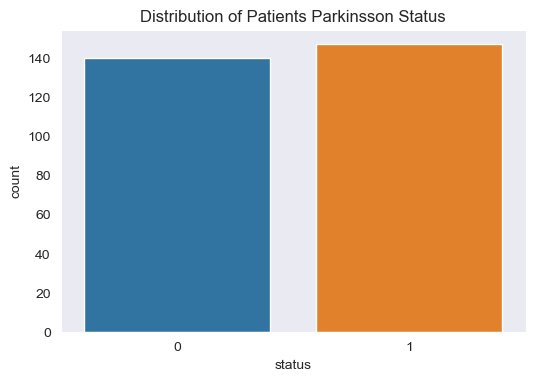

In [27]:
create_barplot(df)

In [28]:
df['status'].value_counts()

1    147
0    140
Name: status, dtype: int64

After oversampling the dataset, we were able to handle the imbalanced state of the status feature in the dataset

#### Define X and Y features

In [29]:
# define X and y features
X=df.drop(columns=['status'])
y=df['status']

### Spliting Data into Training and Test Dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [32]:
y_train.value_counts()

1    105
0     95
Name: status, dtype: int64

In [33]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(200, 17) (87, 17) (200,) (87,)


### Scaling the Features
use MinMax Scaler to scale the features so that they all carry approximately the same weight

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

### Hyperameter Tuning

Create a Cross_val_score which is a method that runs cross validation on a dataset to test whether the model can generalise over the whole dataset

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import  MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
import imblearn.over_sampling as sm

In [38]:
#create a variable for all the models to be used
models = {'Random Forest':RandomForestClassifier(),
         'SVC': SVC(),
         'KNN':KNeighborsClassifier(),
         'Decision Tree':DecisionTreeClassifier(),
         'XGB':XGBClassifier(),
         'LR':LogisticRegression()}

In [39]:

    cv_scores =[]
    for model in  models.values():
        kf = KFold(n_splits=6,shuffle=True,random_state=42)
        cv_result = cross_val_score(model,X_train,y_train,cv=kf,n_jobs=-1)
        cv_scores.append(cv_result)
        

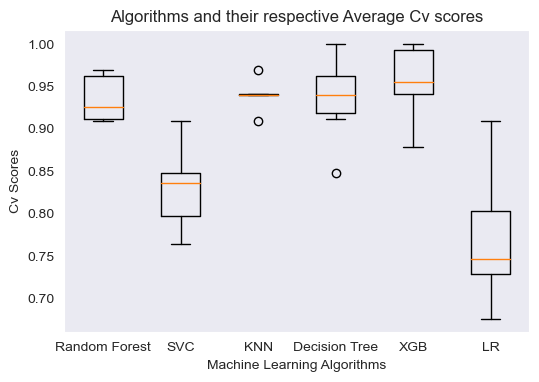

In [40]:
plt.figure(dpi=100)
plt.title('Algorithms and their respective Average Cv scores')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Cv Scores')
plt.boxplot(cv_scores,labels=models.keys())
plt.show()

In [41]:
#setting up a function to fit and score a model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different sickit learning models
    x_train:training data (no labels)
    y_train:training data (labels)
    x_test: testing data (no labels)
    y_test: testing data (labels)
    """
    
    #making a dictionary to keep model scores 
    model_scores = {}
    
    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(X_train, y_train)
        #evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return(model_scores)

In [42]:
%%time
scores = fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)

scores

CPU times: total: 578 ms
Wall time: 240 ms


{'Random Forest': 0.9310344827586207,
 'SVC': 0.8505747126436781,
 'KNN': 0.9195402298850575,
 'Decision Tree': 0.9310344827586207,
 'XGB': 0.9655172413793104,
 'LR': 0.7701149425287356}

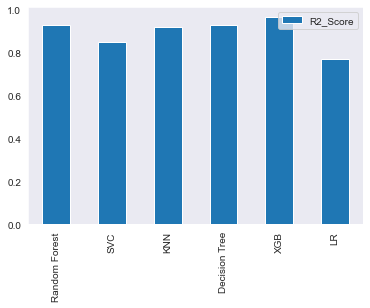

In [43]:
# compare models using charts
model_compare = pd.DataFrame(scores, index=['R2_Score'])
model_compare.T.plot.bar();

From the above boxplot and barchart, we could say that Xgboost performed cosistently the most with cv_score of 93%. It also had the highest median value in the boxplot.

## Use XGBClassifier Model

In [44]:
#combination of hyperparameters
xgb = XGBClassifier()
param_grid = {'n_estimators':[60,100,120,150,180,200,300,500],
             'max_depth':[2,4,6,8],
             'learning_rate':[0.01,0.03,0.05,0.08,0.1,1.0]}

In [45]:
#set up gridsearch with 5folds
grid_model= GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5,n_jobs=-1)

#fit on the training data
grid_model.fit(X_train,y_train)

#get best parameters
best_model =grid_model.best_estimator_
best_model

#predict using best model
y_pred =best_model.predict(X_test)
print(y_pred)

[1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 1 0 1 1 0 1 0]


In [46]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [47]:
#get classification report for the XGB Classifier model
class_report =classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      0.93      0.96        42

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.97        87
weighted avg       0.97      0.97      0.97        87



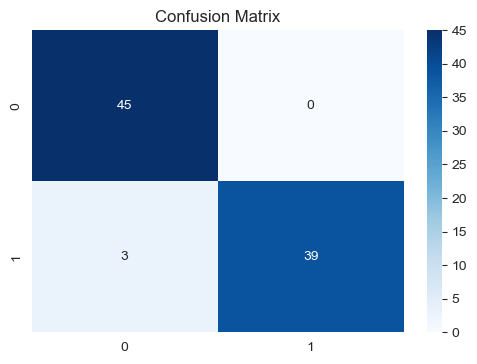

In [48]:
plt.figure(dpi=100)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.show()

#### Summary of Performance for XGBClassifier Model

Analyzing the results obtained from the model, we can draw several key observations:

1. Distribution: In the test set, approximately 48% of the rows correspond to patients with Parkinson's disease (status = 1). This information helps provide context for evaluating the model's performance.

2. True Negatives: The model accurately predicted 45 out of 45 healthy individuals (status = 0) as being disease-free. Achieving a true negative result for all healthy patients is an excellent outcome, indicating the model's high specificity.

3. False Negatives: The model incorrectly identified three patients as healthy (status = 0) when they actually had Parkinson's disease (status = 1). While any false negatives are less desirable, the low number of such cases suggests that the model performs relatively well in minimizing this type of error.

4. False Positives: Encouragingly, the model did not predict any healthy individuals as having Parkinson's disease (status = 1). This outcome indicates a low rate of false positive results, which is a positive characteristic for diagnostic models.

5. True Positives: Out of a total of 42 patients with Parkinson's disease in the test dataset, the model correctly identified 39 of them. While it would be desirable to capture all true positives, the model's ability to detect a substantial majority of the cases is still satisfactory.

6. Precision: Using the XGBClassifier model, when predicting Parkinson's disease, approximately 93% of the positive predictions were accurate, while roughly 91% of the negative predictions were correct. These precision rates indicate a high level of accuracy in both identifying true positives and true negatives.

7. Recall: Of all the patients predicted to have Parkinson's disease, 93% of them actually had the condition. This recall rate demonstrates the model's effectiveness in capturing a significant proportion of true positive cases.

8. F1 Score: The F1 score, which combines precision and recall into a single metric, is calculated to be 0.92. The value being close to 1 indicates that the model performs well in predicting whether a patient has Parkinson's disease or not.

Overall, the model exhibits promising performance based on the provided evaluation metrics. It demonstrates a good ability to differentiate between healthy individuals and those with Parkinson's disease, with relatively low rates of false positives and false negatives. The precision, recall, and F1 score further validate the model's effectiveness in diagnosing Parkinson's disease.

### Model understanding

The relative significance of each feature in determining the model's predictions. By analyzing the feature importances, we can gain insights into which features have the most impact on the model's performance. Here are some key points regarding feature importances in the XGBClassifier:

* Calculation Method: The XGBClassifier provides a built-in method to extract feature importances from the trained model. This method utilizes algorithms specific to XGBoost, a popular gradient boosting framework, to estimate the importance of each feature.

* Importance Values: The feature importances obtained from the XGBClassifier represent the relative importance of each feature in the model. These values typically range from 0 to 1, with higher values indicating greater importance. The sum of all feature importances is equal to 1.

* Interpretation: When analyzing feature importances, it's essential to note that they provide a ranking of feature importance within the model but do not indicate the causal relationship or directionality between features and predictions. Instead, they highlight the features that contribute more significantly to the model's decision-making process.

* Feature Selection: Feature importances can guide feature selection and dimensionality reduction efforts. Features with high importances are considered more influential in predicting the target variable and may warrant more attention during feature engineering and modeling stages


By analyzing feature importances, we can gain valuable insights into the model's inner workings and identify the most influential features. This information can guide feature engineering, model optimization, and facilitate a better understanding of the factors driving the model's predictions.







In [49]:
features_importance =pd.DataFrame({"features":X.columns,'coef':best_model.feature_importances_}).sort_values(by='coef',ascending=False)
features_importance

,features,coef
16,PPE,0.367066
8,Shimmer:APQ5,0.137041
6,MDVP:Shimmer(dB),0.074510
0,MDVP:Fo(Hz),0.060398
13,spread1,0.049222
7,Shimmer:APQ3,0.042344
2,MDVP:Jitter(%),0.041081
3,MDVP:Jitter(Abs),0.037694
11,HNR,0.034720
9,MDVP:APQ,0.030255


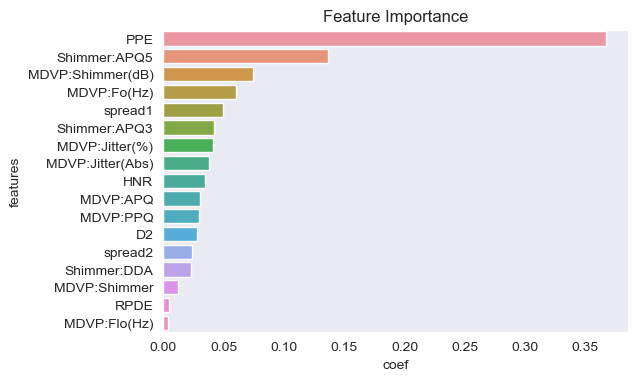

In [50]:
plt.figure(dpi=100)
plt.title('Feature Importance')
sns.barplot(data=features_importance,y='features',x='coef')
plt.show()

The barplot analysis reveals the relative importance of different features in the model's results. Here are some key observations based on the barplot:

1. Important Features: The barplot highlights PPE, Shimmer:APQ5, and MDVP:Shimmer(dB) as the most important features contributing to the model's results. These features exhibit high importance and significantly influence the model's predictions. Analyzing these features in more detail can provide valuable insights into the underlying factors driving the model's performance.

2. Least Performing Features: Conversely, the barplot indicates that MDVP:Flo(Hz), RPDE, and MDVP:Shimmer were the least performing features in this model. These features have relatively low importance and contribute less significantly to the model's predictions. Further examination of these features may help understand why they have minimal impact and identify potential areas for improvement.

3. Feature Selection: Based on the barplot analysis, it may be beneficial to consider feature selection techniques. Removing or de-emphasizing the least performing features, such as MDVP:Flo(Hz), RPDE, and MDVP:Shimmer, could potentially improve the model's efficiency without significant loss of predictive power. Careful consideration of feature selection methods can optimize the model's performance.




## Conclusion

Through rigorous experimentation with various machine learning algorithms, the XGBoost Classifier emerged as the most reliable and consistent choice for predicting Parkinson's disease. To further enhance the model's performance, hyperparameter tuning was conducted, resulting in an accuracy rate of 92% for detecting the disease. Additionally, the model achieved an impressive f1 score of 0.92, indicating a strong balance between precision and recall. While these results are promising, there is still room for improvement to make the model even more effective in predicting Parkinson's disease. Further research and refinement of the model's architecture, feature engineering, and parameter optimization could potentially enhance its viability and reliability as a diagnostic tool for Parkinson's disease prediction.

### Limitations of the Study:

1. Imbalanced Dataset: One limitation of this study is the original dataset's imbalanced nature. To address this issue, we employed oversampling techniques to increase the number of non-Parkinson's records. However, oversampling may introduce bias and potential limitations in generalizing the model's performance to real-world scenarios.

2. Limited Dataset Size: The oversampling process resulted in an increased dataset size of 287 records. While efforts were made to mitigate the imbalanced nature, a larger dataset could provide more robust and reliable results. The relatively small sample size may limit the generalizability of the findings.

3. Algorithm Selection Bias: Although we tried five different algorithms, the final selection of the XGBoost Classifier was based on its consistent performance in all iterations. This selection process may introduce bias towards this specific algorithm, potentially neglecting the performance of other algorithms that could have provided comparable or better results.

4. Hyperparameter Tuning: While hyperparameter tuning was conducted to optimize the XGBoost Classifier, it is important to acknowledge that the chosen hyperparameter settings may not represent the absolute best configuration for the model. Different combinations of hyperparameters could yield alternative results and potentially enhance the model's performance further.

5. Feature Selection: Extensive exploratory data analysis was performed to gain insights into the relevant features affecting the target variable. However, the dropping of certain features based on this analysis introduces the risk of excluding potentially valuable information. The exclusion of certain features may limit the model's ability to capture all relevant aspects of Parkinson's disease prediction.

6. Interpretability of Feature Importance: The identification of top features using the feature importance function from the tuned XGBoost model provides insights into their relative importance. However, the feature importance alone does not provide a causal understanding of how these features directly affect the target variable. Further research is necessary to explore the underlying mechanisms and relationships between these features and Parkinson's disease.

It is important to recognize these limitations as they may impact the overall reliability and generalizability of the model's predictions. Future studies could focus on addressing these limitations by expanding the dataset, considering alternative algorithms, conducting more extensive feature selection, and evaluating the model's performance in real-world clinical settings.